In [140]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [141]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier

# Práctica 4: Overfitting

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama LDPA y puede leer su descripción en la siguiente liga

https://www.openml.org/d/1483

In [142]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(1483, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [143]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'Class'
Todas las características son ['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7']
Las características categóricas son ['V1' 'V2']
Las características numéricas son ['V3' 'V4' 'V5' 'V6' 'V7']


In [144]:
# Impresión de las características
features

,V1,V2,V3,V4,V5,V6,V7
0,1,1,105794.0,105777.0,148933.0,108479.0,109365.0
1,1,4,105795.0,105778.0,155325.0,96952.0,161363.0
2,1,3,105796.0,105779.0,156652.0,101610.0,148870.0
3,1,1,105797.0,105780.0,149736.0,107135.0,102479.0
4,1,2,105798.0,105781.0,155978.0,125455.0,106203.0
...,...,...,...,...,...,...,...
164855,5,2,43687.0,43679.0,106611.0,123166.0,12432.0
164856,5,1,43688.0,43680.0,120821.0,119848.0,87463.0
164857,5,4,43689.0,43681.0,104999.0,110823.0,161536.0
164858,5,2,43690.0,43682.0,102191.0,112520.0,10811.0


In [145]:
outputs

0         3
1         3
2         3
3         3
4         3
         ..
164855    3
164856    3
164857    3
164858    3
164859    3
Name: Class, Length: 164860, dtype: category
Categories (11, object): ['1' < '2' < '3' < '4' ... '8' < '9' < '10' < '11']

A continuación se realiza la partición de __train__ y __test__. __No debe utilizar la partición de test por ningún motivo__.

In [146]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    features, 
    outputs, 
    test_size=0.5, 
    random_state=11
)

## Asignación 1 &#x1F921;

Utilizando las técnicas vistas en clase, realicé su mejor esfuerzo para obtener el mejor modelo lineal posible utilizando __únicamente el conjunto de entrenamiento__ (X_train y y_train). Puede utilizar bibliotecas, pero únicamente las técnicas vistas en clase y debe ir generando métricas o visualizaciones que respalden su toma de decisiones. Debe tener e imprimir una estimación de $E_{out}$ utilizando su conjunto de entrenamiento. La métrica utilizada será la entropía cruzada.

- **V1** = {A, B, C, D, E} = 5 people
- **V2** = {ANKLE_LEFT, ANKLE_RIGHT, CHEST, BELT}
- **V3** = timestamp (Numeric) all unique
- **V4** = date FORMAT (Date)
- **V5** = x coordinate of the tag (Numeric)
- **V6** = y coordinate of the tag (Numeric)
- **V7** = z coordinate of the tag (Numeric)
- **output** = activity = {'walking', 'falling', 'lying down', 'lying', 'sitting down', 'sitting', 'standing up from lying', 'on all fours', 'sitting on the ground', 'standing up from sitting', 'standing up from sitting on the ground'} (Nominal)

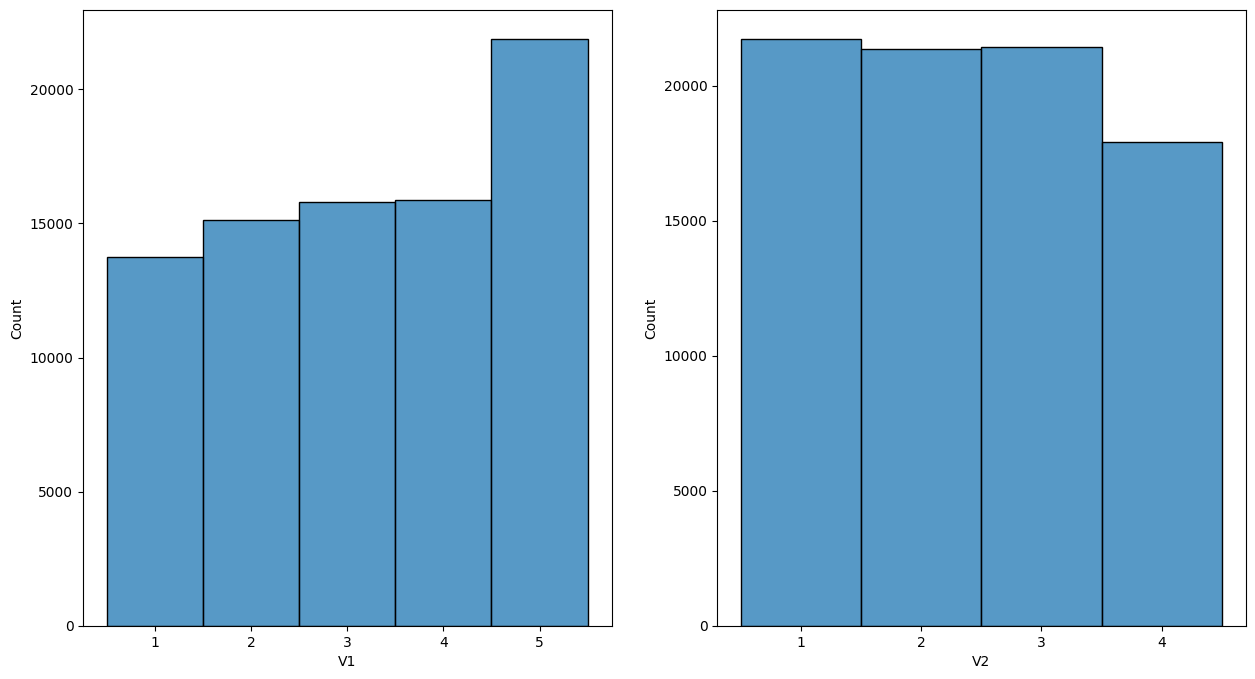

In [147]:
columns = ["V1", "V2"]
fig, axs = plt.subplots(ncols=2, nrows= 1, figsize=(15, 8))

for i, col in enumerate(columns):
    sns.histplot(data = X_train, x = col, ax = axs[i])

In [148]:
# Hacemos One Hot Encoding para V1 y V2
X_train = pd.get_dummies(X_train, prefix=["V1","V2"], columns=["V1","V2"])
X_train

,V3,V4,V5,V6,V7,V1_1,V1_2,V1_3,V1_4,V1_5,V2_1,V2_2,V2_3,V2_4
82677,158321.0,158297.0,72476.0,106489.0,146328.0,0,0,1,0,0,0,0,1,0
2843,108637.0,108619.0,135179.0,75851.0,79479.0,1,0,0,0,0,1,0,0,0
50670,98841.0,98825.0,76316.0,137080.0,101775.0,0,1,0,0,0,0,1,0,0
128441,7274.0,7273.0,97161.0,128160.0,137973.0,0,0,0,0,1,0,0,0,1
10592,116386.0,116368.0,70382.0,140689.0,119402.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102327,56803.0,56792.0,146134.0,114564.0,47575.0,0,0,0,1,0,0,1,0,0
97617,52093.0,52085.0,54989.0,81198.0,26584.0,0,0,0,1,0,0,1,0,0
21584,127378.0,127358.0,44795.0,105412.0,49255.0,1,0,0,0,0,1,0,0,0
36543,84714.0,84700.0,59207.0,33106.0,114460.0,0,1,0,0,0,0,1,0,0


In [149]:
X_train["V3"] = (X_train["V3"] - X_train["V3"].mean()) / X_train["V3"].std()
X_train["V4"] = (X_train["V4"] - X_train["V4"].mean()) / X_train["V4"].std()
X_train["V5"] = (X_train["V5"] - X_train["V5"].mean()) / X_train["V5"].std()
X_train["V6"] = (X_train["V6"] - X_train["V6"].mean()) / X_train["V6"].std()
X_train["V7"] = (X_train["V7"] - X_train["V7"].mean()) / X_train["V7"].std()
X_train

,V3,V4,V5,V6,V7,V1_1,V1_2,V1_3,V1_4,V1_5,V2_1,V2_2,V2_3,V2_4
82677,1.594401,1.594403,-0.197887,0.522237,1.349064,0,0,1,0,0,0,0,1,0
2843,0.549977,0.549953,1.128656,-0.126258,-0.059436,1,0,0,0,0,1,0,0,0
50670,0.344051,0.344040,-0.116648,1.169737,0.410338,0,1,0,0,0,0,1,0,0
128441,-1.580811,-1.580786,0.324348,0.980933,1.173025,0,0,0,0,1,0,0,0,1
10592,0.712871,0.712871,-0.242187,1.246126,0.781736,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102327,-0.539644,-0.539679,1.360420,0.693155,-0.731650,0,0,0,1,0,0,1,0,0
97617,-0.638655,-0.638641,-0.567841,-0.013081,-1.173928,0,0,0,1,0,0,1,0,0
21584,0.943938,0.943929,-0.783505,0.499441,-0.696253,1,0,0,0,0,1,0,0,0
36543,0.047083,0.047070,-0.478605,-1.031014,0.677609,0,1,0,0,0,0,1,0,0


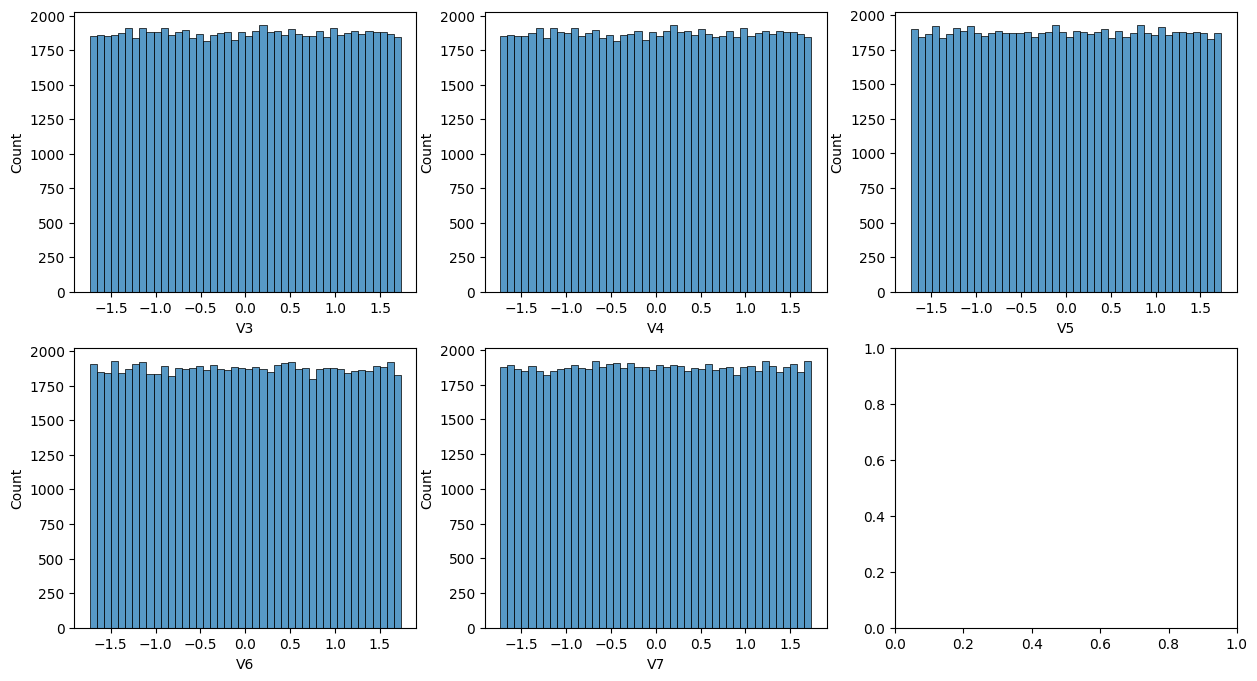

In [150]:
columns = ["V3", "V4", "V5", "V6", "V7"]
fig, axs = plt.subplots(ncols=3, nrows= 2, figsize=(15, 8))

for i, col in enumerate(columns):
    sns.histplot(data = X_train, x = col, ax = axs[i // 3, i % 3])

In [151]:
X_train = X_train.drop(columns=['V3', 'V4'])
X_train

,V3,V4,V5,V6,V7,V1_1,V1_2,V1_3,V1_4,V1_5,V2_1,V2_2,V2_3,V2_4
82677,1.594401,1.594403,-0.197887,0.522237,1.349064,0,0,1,0,0,0,0,1,0
2843,0.549977,0.549953,1.128656,-0.126258,-0.059436,1,0,0,0,0,1,0,0,0
50670,0.344051,0.344040,-0.116648,1.169737,0.410338,0,1,0,0,0,0,1,0,0
128441,-1.580811,-1.580786,0.324348,0.980933,1.173025,0,0,0,0,1,0,0,0,1
10592,0.712871,0.712871,-0.242187,1.246126,0.781736,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102327,-0.539644,-0.539679,1.360420,0.693155,-0.731650,0,0,0,1,0,0,1,0,0
97617,-0.638655,-0.638641,-0.567841,-0.013081,-1.173928,0,0,0,1,0,0,1,0,0
21584,0.943938,0.943929,-0.783505,0.499441,-0.696253,1,0,0,0,0,1,0,0,0
36543,0.047083,0.047070,-0.478605,-1.031014,0.677609,0,1,0,0,0,0,1,0,0


In [152]:
model_train = LogisticRegressionCV(cv=10).fit(X_train, y_train)

print(model_train.score(X_train, y_train))

c:\Users\Iván\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Iván\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

0.40161349023413806


In [153]:
model = SGDClassifier(max_iter=1000, tol=1e-3)
model = model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.27833313114157465


In [154]:
X_test = pd.get_dummies(X_test, prefix=["V1","V2"], columns=["V1","V2"])
X_test["V5"] = (X_test["V5"] - X_test["V5"].mean()) / X_test["V5"].std()
X_test["V6"] = (X_test["V6"] - X_test["V6"].mean()) / X_test["V6"].std()
X_test["V7"] = (X_test["V7"] - X_test["V7"].mean()) / X_test["V7"].std()
X_test = X_test.drop(columns=['V3', 'V4'])
X_test

,V3,V4,V5,V6,V7,V1_1,V1_2,V1_3,V1_4,V1_5,V2_1,V2_2,V2_3,V2_4
9783,115577.0,115559.0,0.176290,-1.352314,0.833746,1,0,0,0,0,0,0,0,1
85013,160657.0,160632.0,-1.619480,1.401209,-0.364537,0,0,1,0,0,0,0,0,1
70883,146527.0,146506.0,-1.161273,0.401124,0.703193,0,0,1,0,0,1,0,0,0
64466,140110.0,140090.0,-1.363816,-0.380658,-1.494120,0,0,1,0,0,0,1,0,0
82448,158092.0,158068.0,-1.730764,1.692979,1.722362,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102897,57373.0,57362.0,-0.363664,-0.564135,-0.284166,0,0,0,1,0,1,0,0,0
40732,88903.0,88889.0,-1.011701,-1.062790,-0.213295,0,1,0,0,0,0,1,0,0
114945,69421.0,69407.0,-1.238103,-0.935854,1.088639,0,0,0,1,0,0,0,1,0
19389,125183.0,125165.0,0.868697,-1.353691,0.161006,1,0,0,0,0,0,1,0,0


In [155]:
print("Logistic Regression CV =", model_train.score(X_test, y_test), "vs", model_train.score(X_train, y_train))
print("SGDClassifier = ", model.score(X_test, y_test), "vs", model.score(X_train, y_train))

Logistic Regression CV =  0.0715152250394274 vs 0.40161349023413806
SGDClassifier =  0.33133567875773384 vs 0.27833313114157465


## Asignación 2 &#x1F921;

Evalue su modelo final en el conjunto de test (X_test y y_test). Su práctica será evaluada acorde a las técnicas aplicadas, la estimación de $E_{out}$, el valor de $E_{test}$, y contra las métricas obtenidas por sus compañeros.